
AAPL Key Figures:


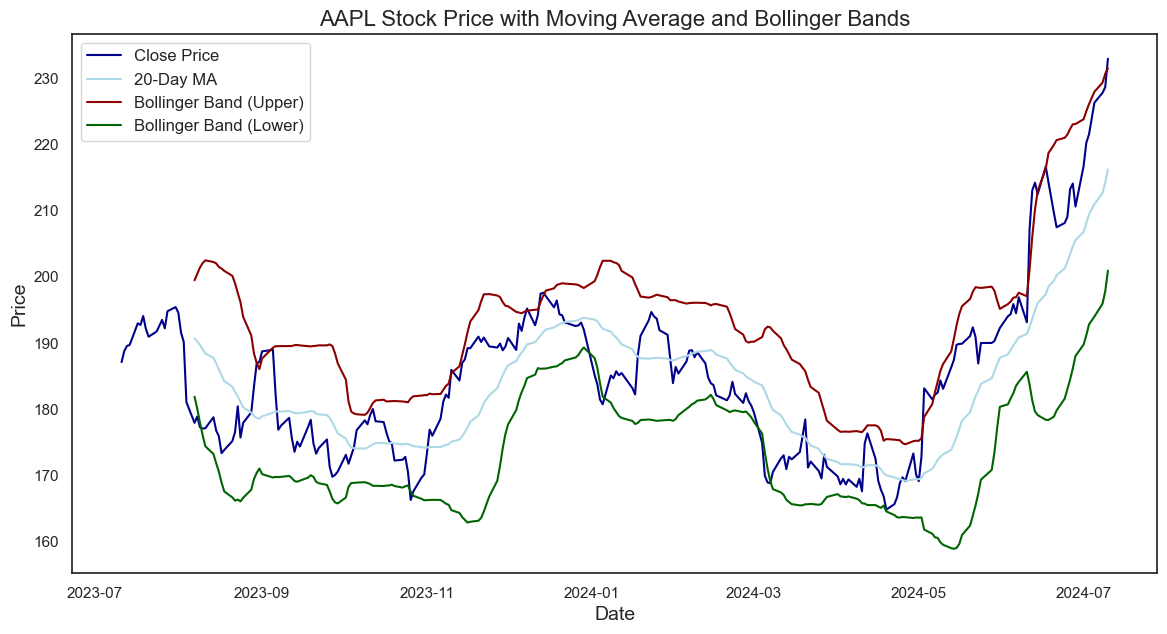

Latest Price: 232.98 USD
Beta: 1.24
Cyclical: No
Sector: Technology
Country: United States
Currency: USD

NVDA Key Figures:


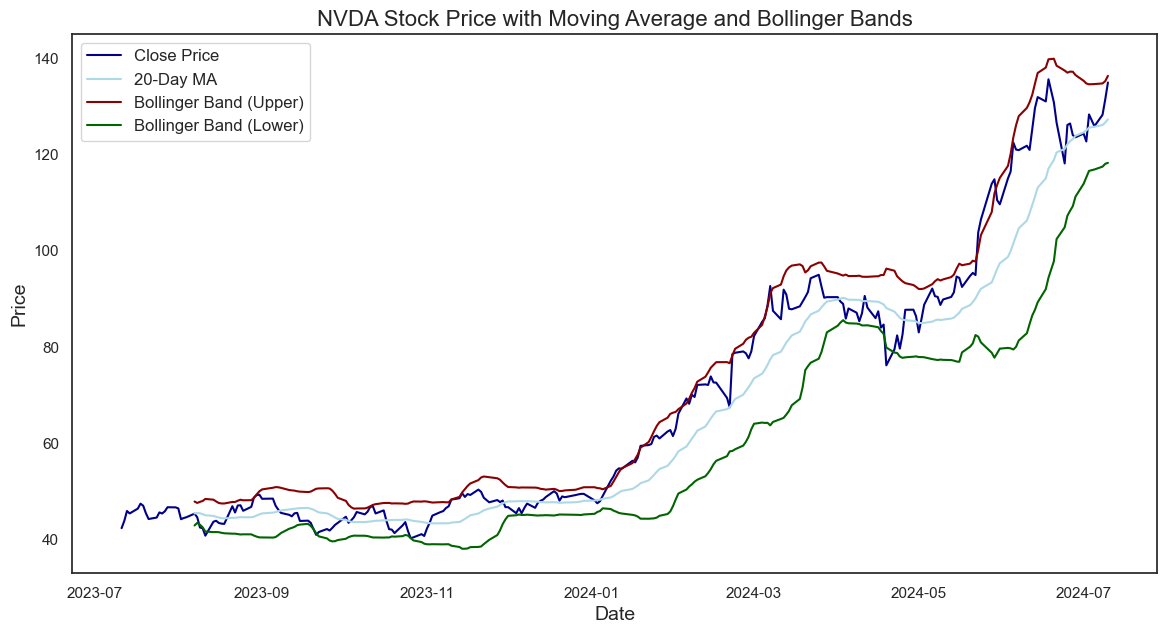

Latest Price: 134.91 USD
Beta: 1.68
Cyclical: No
Sector: Technology
Country: United States
Currency: USD

NOVO-B.CO Key Figures:


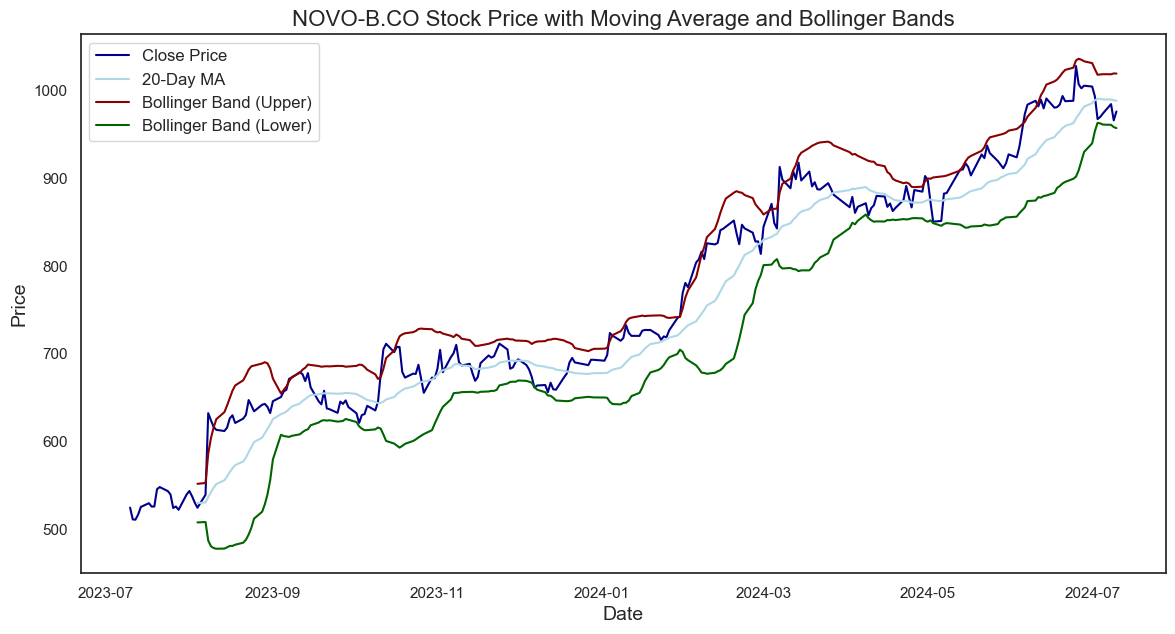

Latest Price: 976.2 DKK
Beta: 0.15
Cyclical: No
Sector: Healthcare
Country: Denmark
Currency: DKK

BO.CO Key Figures:


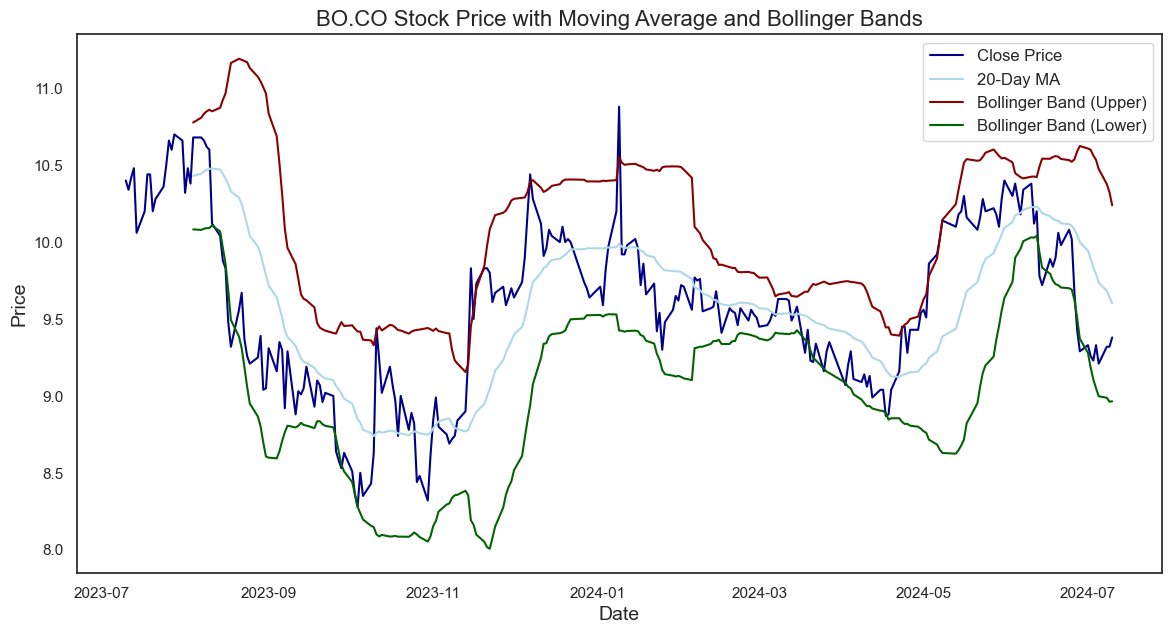

Latest Price: 9.38 DKK
Beta: 1.46
Cyclical: No
Sector: Technology
Country: Denmark
Currency: DKK

RACE Key Figures:


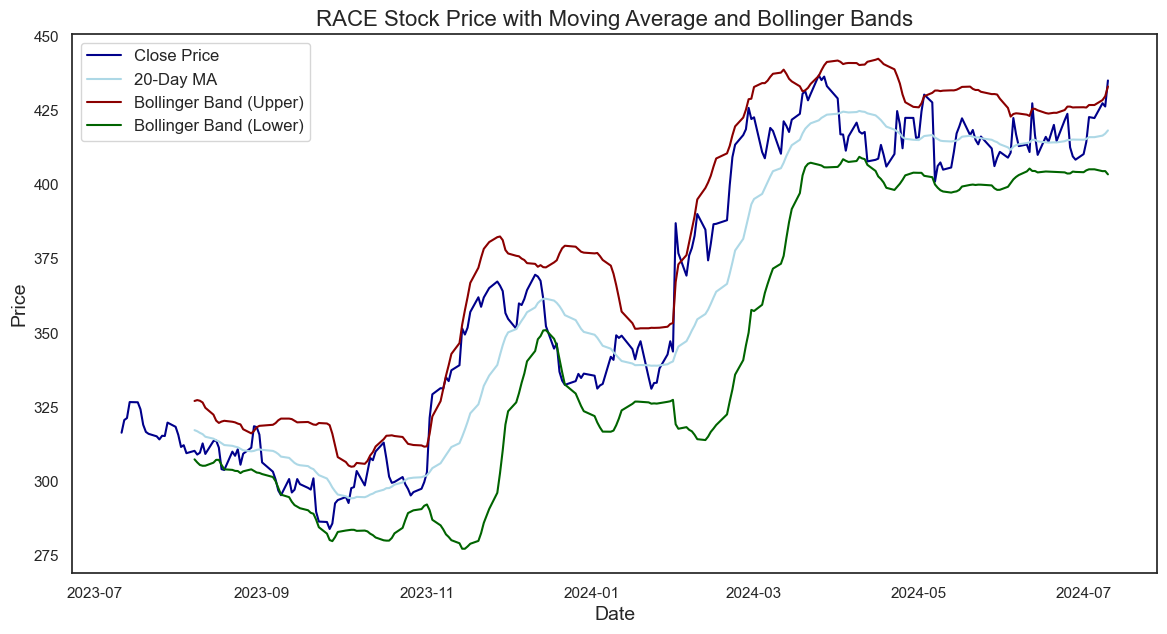

Latest Price: 435.05 USD
Beta: 0.99
Cyclical: No
Sector: Consumer Cyclical
Country: Italy
Currency: USD

RHM.DE Key Figures:


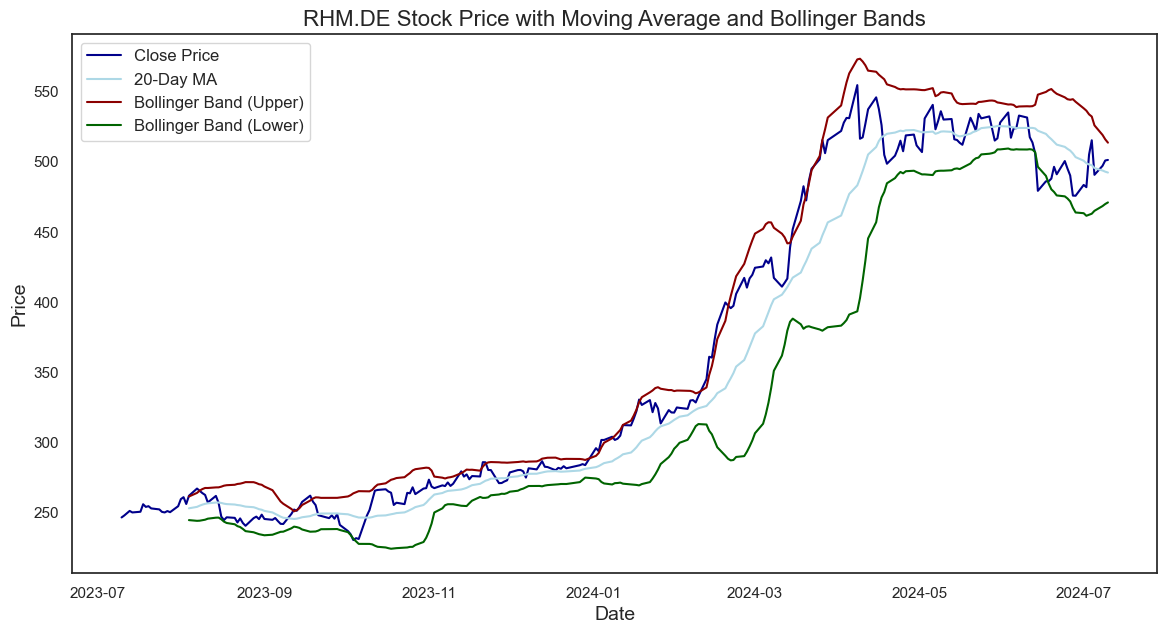

Latest Price: 501.2 EUR
Beta: 0.69
Cyclical: No
Sector: Industrials
Country: Germany
Currency: EUR

SAAB-B.ST Key Figures:


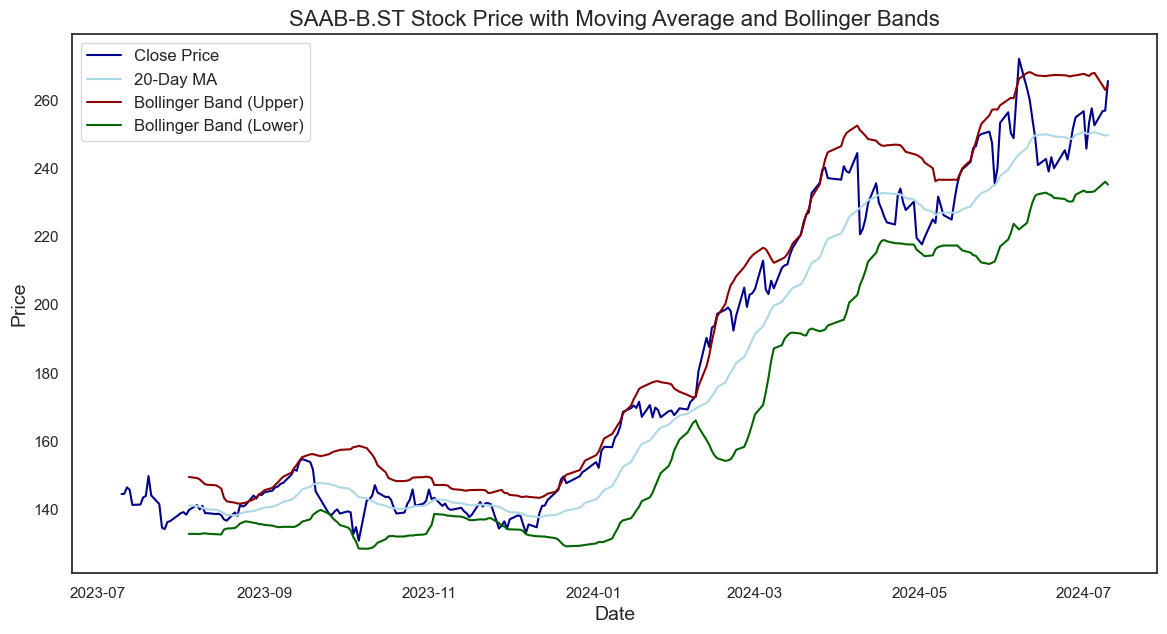

Latest Price: 265.7 SEK
Beta: 0.52
Cyclical: No
Sector: Industrials
Country: Sweden
Currency: SEK

TKA.DE Key Figures:


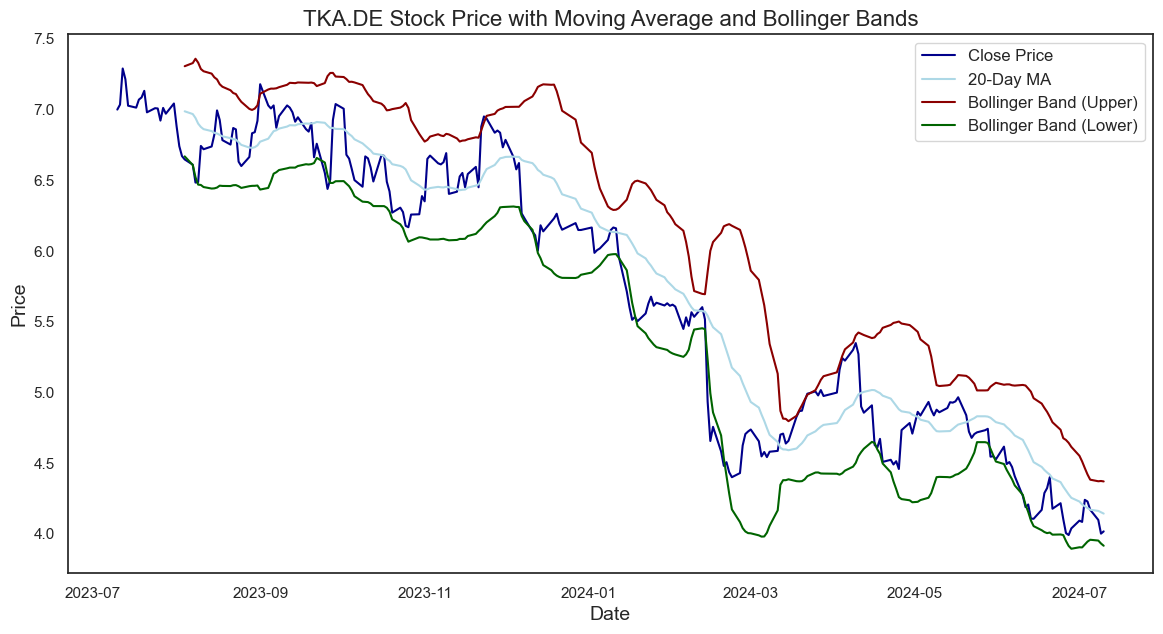

Latest Price: 4.02 EUR
Beta: 1.96
Cyclical: No
Sector: Industrials
Country: Germany
Currency: EUR

P911.DE Key Figures:


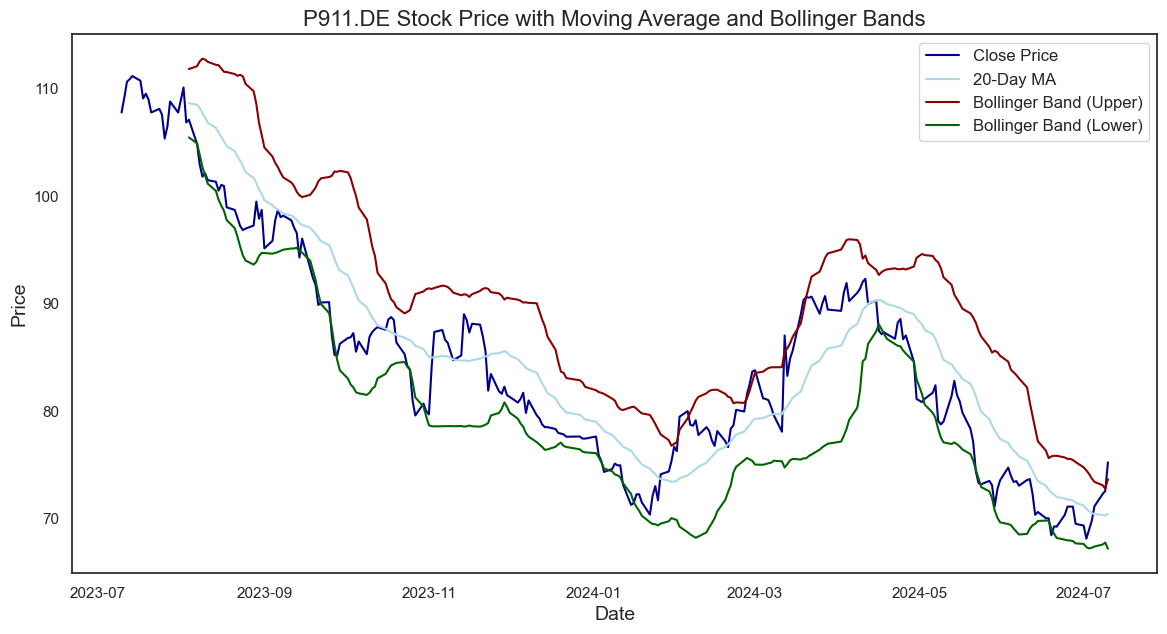

Latest Price: 75.24 EUR
Beta: nan
Cyclical: No
Sector: Consumer Cyclical
Country: Germany
Currency: EUR

PLTR Key Figures:


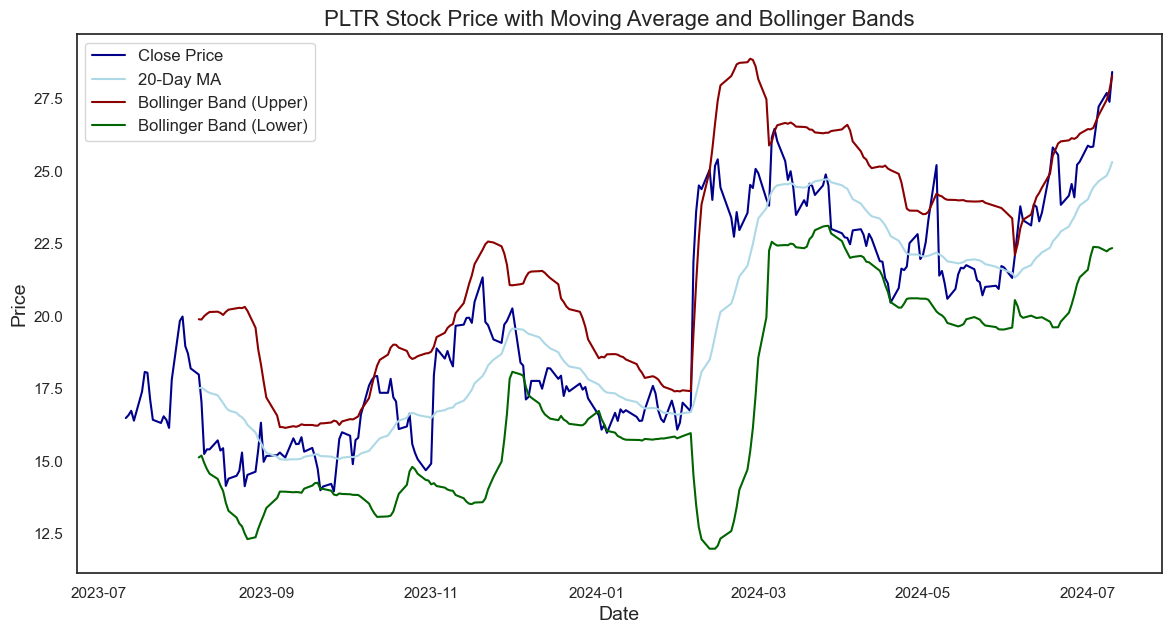

Latest Price: 28.42 USD
Beta: 2.71
Cyclical: No
Sector: Technology
Country: United States
Currency: USD

RIVN Key Figures:


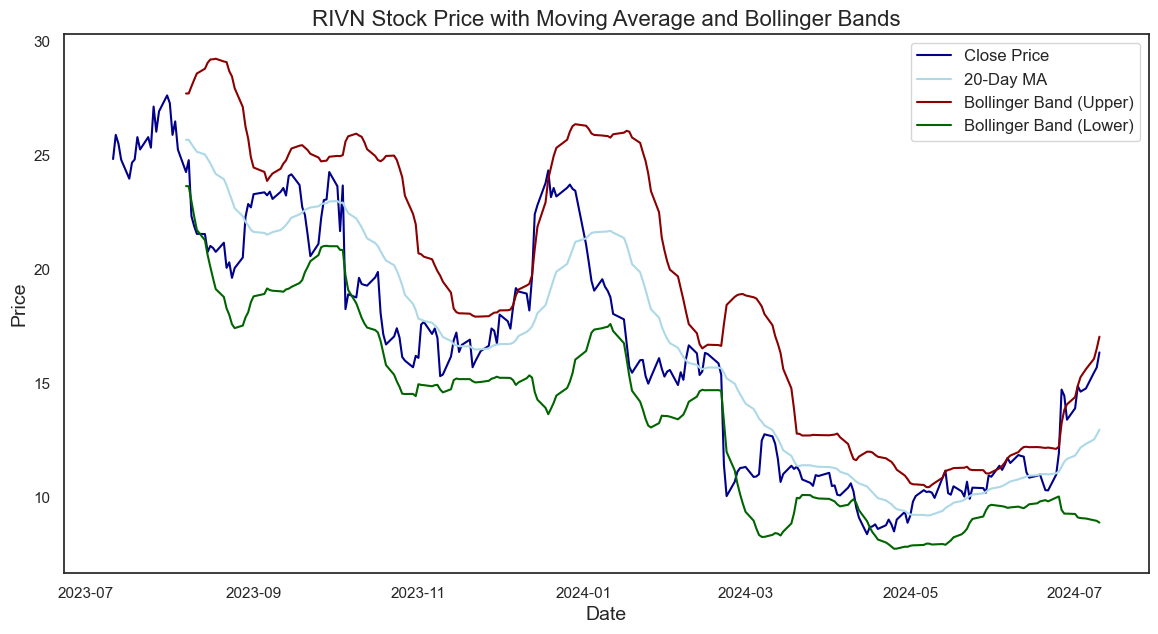

Latest Price: 16.37 USD
Beta: 2.08
Cyclical: No
Sector: Consumer Cyclical
Country: United States
Currency: USD

ORSTED.CO Key Figures:


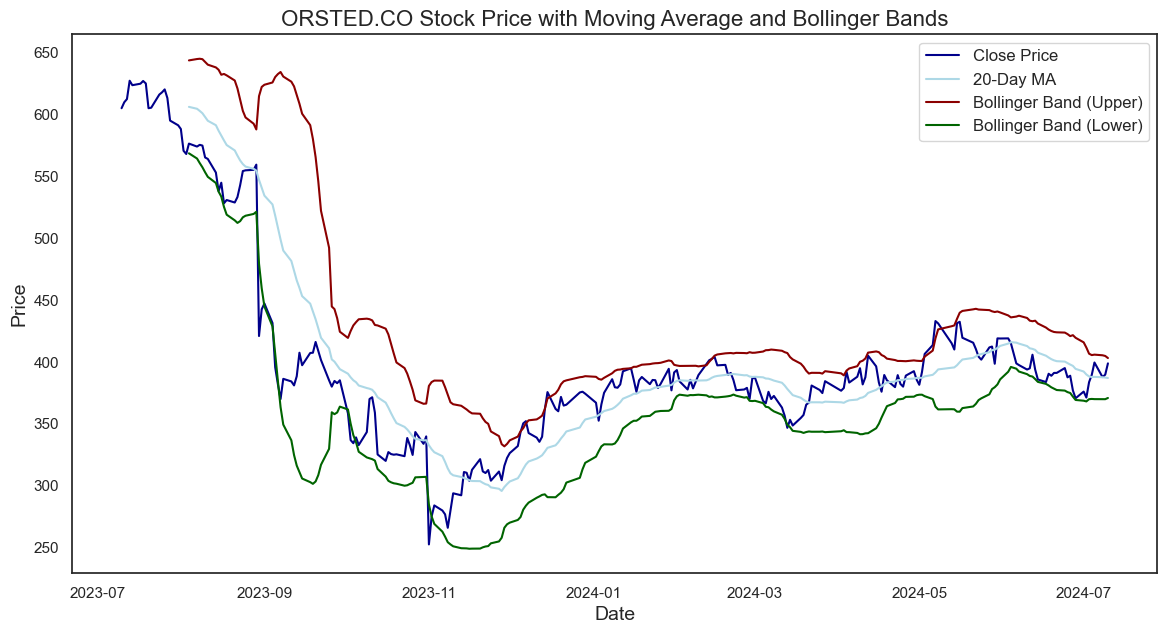

Latest Price: 398.8 DKK
Beta: 0.71
Cyclical: No
Sector: Utilities
Country: Denmark
Currency: DKK

MOWI.OL Key Figures:


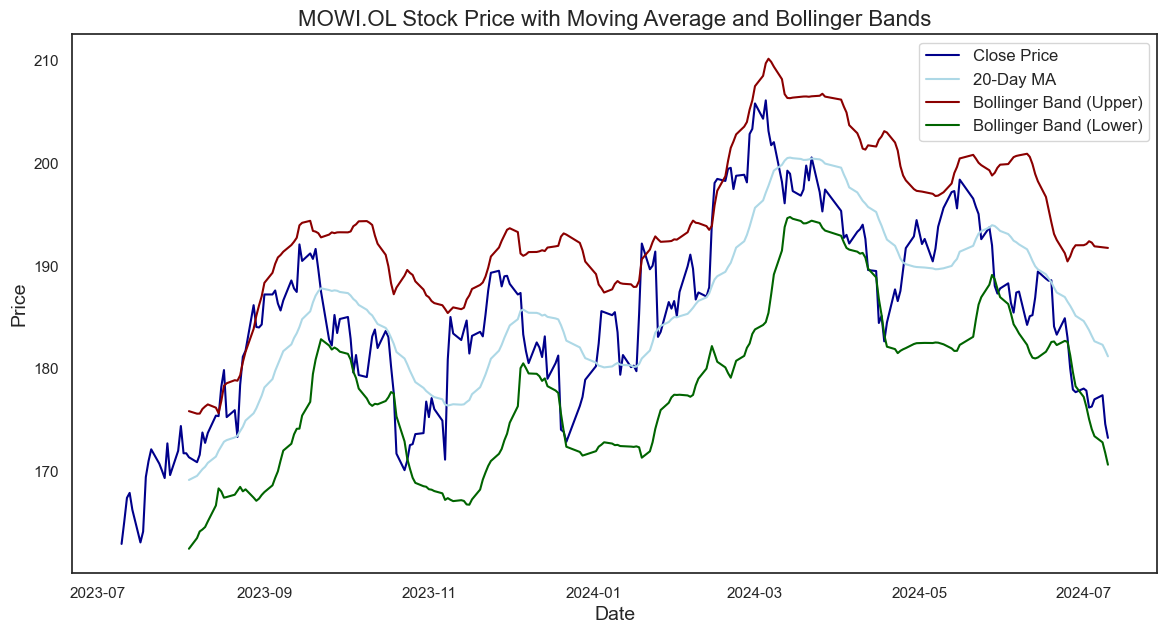

Latest Price: 173.25 NOK
Beta: 0.97
Cyclical: No
Sector: Consumer Defensive
Country: Norway
Currency: NOK

SALM Key Figures:


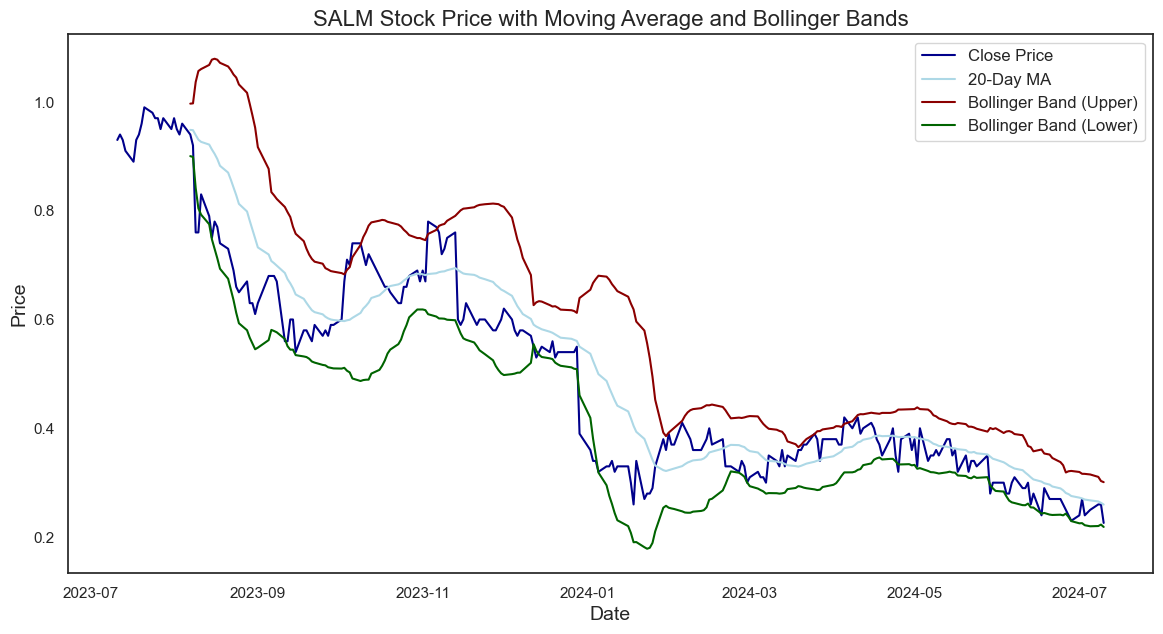

Latest Price: 0.23 USD
Beta: 0.77
Cyclical: No
Sector: Communication Services
Country: United States
Currency: USD

SALME.OL Key Figures:


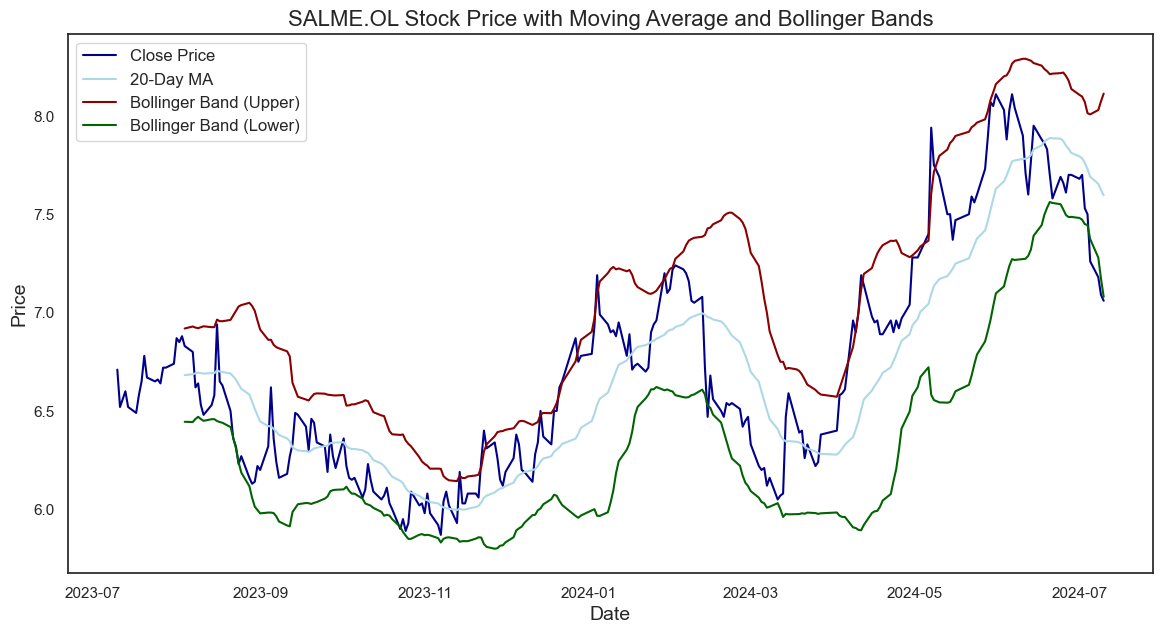

Latest Price: 7.06 NOK
Beta: 0.6
Cyclical: No
Sector: Consumer Defensive
Country: Norway
Currency: NOK


In [2]:
# Import necessary packages

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stock_with_indicators(ticker):
    # Define historic stock prices
    stock = yf.Ticker(ticker)
    df = stock.history(period='1y')
    
    # Calculate moving average and Bollinger Bands
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['BB_up'] = df['MA20'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_down'] = df['MA20'] - 2 * df['Close'].rolling(window=20).std()

    # Replace infinite values with NaN
    df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

    # Set Seaborn style
    sns.set(style='white', rc={'axes.facecolor':'white', 'grid.color': 'white'})

    # Plot the data
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Close Price', color='darkblue')
    plt.plot(df.index, df['MA20'], label='20-Day MA', color='lightblue')
    plt.plot(df.index, df['BB_up'], label='Bollinger Band (Upper)', color='darkred')
    plt.plot(df.index, df['BB_down'], label='Bollinger Band (Lower)', color='darkgreen')
    plt.title(f"{ticker} Stock Price with Moving Average and Bollinger Bands", fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(False)  # Turn off the grid
    plt.show()

    # Get key valyes for analysis
    info = stock.info
    key_figures = {
        'Latest Price': f"{round(df['Close'].iloc[-1], 2)} {info.get('currency')}",
        'Beta': round(info.get('beta', float('nan')), 2),
        'Cyclical': 'Yes' if info.get('industry') in ['Consumer Cyclical', 'Financial Services', 'Real Estate'] else 'No',
        'Sector': info.get('sector'),
        'Country': info.get('country'),
        'Currency': info.get('currency')
    }
    
    return key_figures

# List of stock tickers to watch input
watchlist = ['AAPL', 'NVDA', 'NOVO-B.CO', 'BO.CO', 'RACE', 'RHM.DE', 'SAAB-B.ST', 'TKA.DE', 'P911.DE', 'PLTR', 'RIVN', 'ORSTED.CO', 'MOWI.OL', 'SALM', 'SALME.OL']

# Display plots and key figures for each stock in the watchlist
for ticker in watchlist:
    print(f"\n{ticker} Key Figures:")
    key_figures = plot_stock_with_indicators(ticker)
    for key, value in key_figures.items():
        print(f"{key}: {value}")